In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

#### Contenido:
Este conjunto de datos compilado se extrajo de otros cuatro conjuntos de datos vinculados por tiempo y lugar, y se creó para encontrar señales correlacionadas con el aumento de las tasas de suicidio entre diferentes cohortes a nivel mundial, en todo el espectro socioeconómico.

#### Columnas:
país, año, sexo, grupo de edad, conteo de suicidios, población, tasa de suicidios, clave compuesta país-año, IDH por año, gdp_for_year, gdp_per_capita, generación (según el promedio de agrupación por edad).

#### Definiciones:

- **HDI (IDH):** Indice de desarrollo humano. Es un indicador sintético de los logros,medios obtenidos en las dimensiones fundamentales del desarrollo humano, a saber, tener una vida larga y saludable, adquirir conocimientos y disfrutar de un nivel de vida digno.
- **GDP (PIB):** Producto interno bruto.

### Objetivos (borrador):

#### Clasificacion (**clases bien definidas, pertenecen a los naturales**):

#### Regresion (**Pertenecen a los reales**):

- Predecir el numero de suicidos (suicides_no) para unos determinados datos de entrada (country, year, sex, age, ¿population?).
- Precedir la probabilidad de que una persona se suicide (**suicides_no(desconocido) / population**) segun ciertas condiciones (**Locacion especifica, condiciones de vida, ...**) <p> **Posibles complicaciones**: Solo se estaria determinando la probabilidad a partir de las condiciones de vida sociales dejando de lado las personales, ¿hasta que punto es posible realizar regrecion? teniendo en cuenta la caractaristica **year**.</p>

In [2]:
d = pd.read_csv("master.csv")
print d.shape

(27820, 12)


In [3]:
d.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k_pop country-year  HDI_for_year   gdp_for_year  \
0               6.71  Albania1987           NaN  2,156,624,900   
1               5.19  Albania1987           NaN  2,156,624,900   
2               4.83  Albania1987           NaN  2,156,624,900   
3               4.59  Albania1987           NaN  2,156,624,900   
4               3.28  Albania1987           NaN  2,156,624,900   

   gdp_per_capita       generation  
0             796     Generation X  
1             796           Silent  
2             796     Generation X  
3             796  G.I. Generation  
4             796          Boomers

In [4]:
set(d.values[:,3])
#set(d.values[:,3])
#set(d.values[:,0])
#set(d.values[:,1])

{'15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years'}

In [44]:
for i in range(d.shape[0]):
    print(d.values[i,7] == d.values[i,0]+str(d.values[i,1]))

True


##### **Conclusion:** Las columnas "country", "year" y "country-year" son basicamente la misma informacion

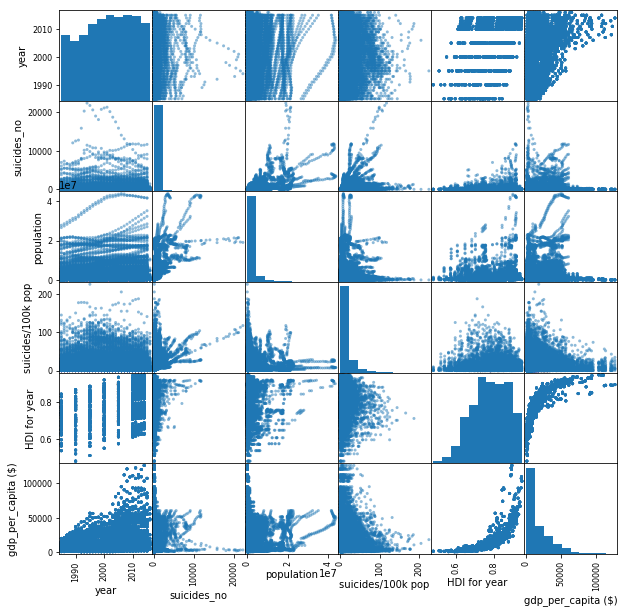

In [3]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

Eleccion de caracteristicas:
<p> X { <b>country (string) ,year ,sex ,age (string),suicides_no ,population ,HDI for year ,gdp_for_year ,gdp_per_capita ,generation (string)} </b></p>
<p> y { <b> suicides_no </b> } </p>
<p> <b>Posibles complicaciones</b>: <b>country</b> debe pasarse a valores de cordenadas o una representacion numerica, <b>sex</b> podria tomar valores de 0 y 1, ¿como deberia manejarse <b>generacion</b>?</p>

### Country
Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Trinidad and Tobago',
 'Turkey',
 'Turkmenistan',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan

In [4]:
country_codes = pd.read_csv("wikipedia-iso-country-codes.csv")

In [5]:
country_codes.head()

English_short_name_lower_case Alpha-2_code Alpha-3_code  Numeric_code  \
0                   Afghanistan           AF          AFG             4   
1                 Åland Islands           AX          ALA           248   
2                       Albania           AL          ALB             8   
3                       Algeria           DZ          DZA            12   
4                American Samoa           AS          ASM            16   

      ISO_3166-2  
0  ISO 3166-2:AF  
1  ISO 3166-2:AX  
2  ISO 3166-2:AL  
3  ISO 3166-2:DZ  
4  ISO 3166-2:AS

'Cabo Verde',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines'}

In [6]:
d.country.values[d.country.values == "Cabo Verde"] = "Cape Verde"
d.country.values[d.country.values == "Macau"] = "Macao"
d.country.values[d.country.values == "Republic of Korea"] = "Korea, Republic of"
d.country.values[d.country.values == "Saint Vincent and Grenadines"] = "Saint Vincent and the Grenadines"

In [8]:
for i in range(d.values[:,0].shape[0]):
    new = country_codes.Numeric_code.values[country_codes.English_short_name_lower_case.values == d.country.values[i]]
    if (new.shape[0] != 0):
        d.country.values[i] = new[0]

In [9]:
set(d.values[:,0])

{8,
 28,
 31,
 32,
 36,
 40,
 44,
 48,
 51,
 52,
 56,
 70,
 76,
 84,
 100,
 112,
 124,
 132,
 144,
 152,
 170,
 188,
 191,
 192,
 196,
 203,
 208,
 212,
 218,
 222,
 233,
 242,
 246,
 250,
 268,
 276,
 296,
 300,
 308,
 320,
 328,
 348,
 352,
 372,
 376,
 380,
 388,
 392,
 398,
 410,
 414,
 417,
 428,
 440,
 442,
 446,
 462,
 470,
 480,
 484,
 496,
 499,
 512,
 528,
 533,
 554,
 558,
 578,
 591,
 600,
 608,
 616,
 620,
 630,
 634,
 642,
 643,
 659,
 662,
 670,
 674,
 688,
 690,
 702,
 703,
 705,
 710,
 724,
 740,
 752,
 756,
 764,
 780,
 784,
 792,
 795,
 804,
 826,
 840,
 858,
 860}

### Age
'5-14 years',
'15-24 years',
'25-34 years',
'35-54 years',
'55-74 years',
'75+ years'

In [10]:
d.age.values[d.age.values == "5-14 years"] = 0
d.age.values[d.age.values == "15-24 years"] = 1
d.age.values[d.age.values == "25-34 years"] = 2
d.age.values[d.age.values == "35-54 years"] = 3
d.age.values[d.age.values == "55-74 years"] = 4
d.age.values[d.age.values == "75+ years"] = 5

In [11]:
set(d.values[:,3])

{0, 1, 2, 3, 4, 5}

### Generation
'Boomers',
 'G.I. Generation',
 'Generation X',
 'Generation Z',
 'Millenials',
 'Silent'

In [12]:
d.generation.values[d.generation.values == "Boomers"] = 0
d.generation.values[d.generation.values == "G.I. Generation"] = 1
d.generation.values[d.generation.values == "Generation X"] = 2
d.generation.values[d.generation.values == "Generation Z"] = 3
d.generation.values[d.generation.values == "Millenials"] = 4
d.generation.values[d.generation.values == "Silent"] = 5

In [13]:
set(d.values[:,11])

{0, 1, 2, 3, 4, 5}

### Sex
'male', 'female'

In [14]:
d.sex.values[d.sex.values == "male"] = 0
d.sex.values[d.sex.values == "female"] = 1

### Gdp for year ($)

0,000,000,000

In [16]:
for i in range(d.values[:,0].shape[0]):
    res = d.gdp_for_year.values[i].split(',')
    d.gdp_for_year.values[i] = int(''.join(res))

### NaN

In [18]:
d = d.where((pd.notnull(d)), 0)

In [19]:
np.prod(pd.notnull(d)) 

country              1
year                 1
sex                  1
age                  1
suicides_no          1
population           1
suicides/100k_pop    1
country-year         1
HDI_for_year         1
gdp_for_year         1
gdp_per_capita       1
generation           1
dtype: int64

In [20]:
d.head()

country  year sex age  suicides_no  population  suicides/100k_pop  \
0       8  1987   0   1           21      312900               6.71   
1       8  1987   0   3           16      308000               5.19   
2       8  1987   1   1           14      289700               4.83   
3       8  1987   0   5            1       21800               4.59   
4       8  1987   0   2            9      274300               3.28   

  country-year  HDI_for_year gdp_for_year  gdp_per_capita generation  
0  Albania1987           0.0   2156624900             796          2  
1  Albania1987           0.0   2156624900             796          5  
2  Albania1987           0.0   2156624900             796          2  
3  Albania1987           0.0   2156624900             796          1  
4  Albania1987           0.0   2156624900             796          0

In [21]:
export_csv = d.to_csv (r'export_dataframe.csv', index = None, header=True)